In [23]:
#todo Wednesd Publication_Day
#todo fillna with mean
#todo KNN imputation if the missing rate is high.
#todo Create new features that may capture underlying patterns (e.g., interaction terms, polynomial features).
#todo Encode categorical variables using one-hot encoding, target encoding
#todo normalize num cols
#todo change types cat to category, num to int8 after normalization
#todo create separate file for data preparation

In [129]:
##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [75]:
warnings.filterwarnings('ignore')

In [8]:
##
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None

In [9]:
##
submission = pd.read_csv('data/sample_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
print(train.shape)

(25265, 12)


In [10]:
drop_cols = ['id']
cat_cols = ['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
num_cols = [col for col in train.columns if col not in drop_cols+cat_cols]

In [11]:
train.loc[:, num_cols].describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,"22,336.00","25,265.00","20,373.00","25,264.00","25,264.00"
mean,64.83,59.89,52.06,1.34,45.76
std,32.93,23.02,28.37,1.10,27.14
min,5.00,20.00,0.01,0.00,0.00
25%,36.29,39.21,28.36,0.00,23.71
50%,64.31,60.08,53.13,1.00,43.95
75%,94.39,79.68,76.32,2.00,65.02
max,119.97,117.76,107.08,3.00,119.97


In [12]:
train.loc[:, cat_cols].describe(include='all')

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,25265,25265,25265,25265,25264,25264
unique,48,100,10,8,4,3
top,Tech Talks,Episode 62,Sports,Sunday,Night,Neutral
freq,759,368,2942,3903,6633,8549


In [128]:
s1 = train.isna().sum().sort_values(ascending=False)
s2 = test.isna().sum().sort_values(ascending=False)

pd.merge(s1.to_frame(), s2.to_frame(), left_index=True, right_index=True, how='outer', suffixes=['_train', '_test'])


,0_train,0_test
Episode_Length_minutes,2929,"3,104.00"
Episode_Sentiment,1,1.00
Episode_Title,0,0.00
Genre,0,1.00
Guest_Popularity_percentage,4892,"5,309.00"
Host_Popularity_percentage,0,1.00
Listening_Time_minutes,1,NaN
Number_of_Ads,1,1.00
Podcast_Name,0,0.00
Publication_Day,0,1.00


In [70]:
s1 = train['Episode_Title'].value_counts(normalize=True)
s2 = test['Episode_Title'].value_counts(normalize=True)

pd.merge(s1.to_frame(), s2.to_frame(), left_index=True, right_index=True, how='outer', suffixes=['_train', '_test'])


,proportion_train,proportion_test
Episode_Title,,
Episode 1,0.01,0.01
Episode 10,0.01,0.01
Episode 100,0.01,0.01
Episode 11,0.01,0.01
Episode 12,0.01,0.01
...,...,...
Episode 95,0.01,0.01
Episode 96,0.01,0.01
Episode 97,0.01,0.01


/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number_of_Ads', ylabel='Density'>

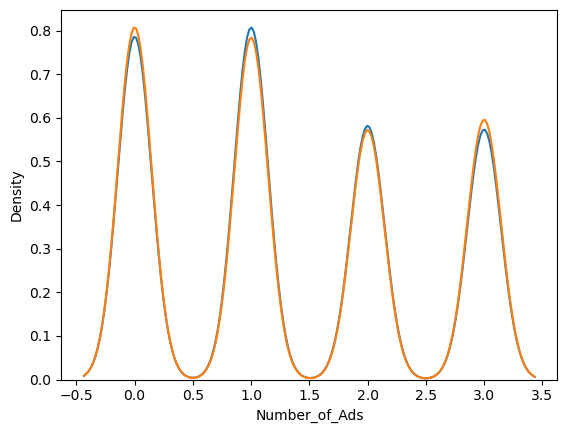

In [36]:
col = \
    'Number_of_Ads'
sns.kdeplot(x=train[col])
sns.kdeplot(x=test[col])

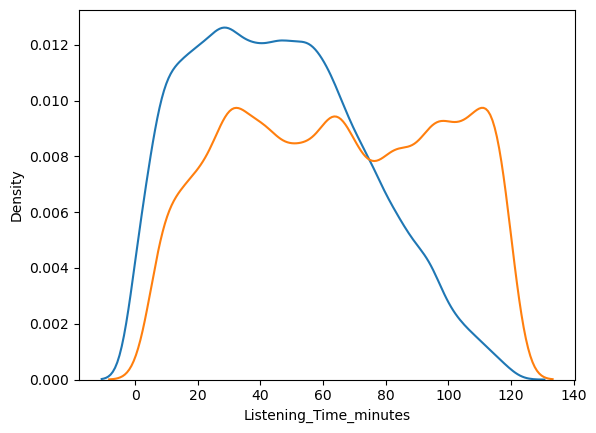

In [79]:
sns.kdeplot(x=train['Listening_Time_minutes'])
sns.kdeplot(x=train['Episode_Length_minutes'])
plt.show()

In [80]:
train.loc[:, num_cols].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
Episode_Length_minutes,1.00,0.02,-0.01,-0.06,0.92
Host_Popularity_percentage,0.02,1.00,0.02,-0.02,0.05
Guest_Popularity_percentage,-0.01,0.02,1.00,0.01,-0.02
Number_of_Ads,-0.06,-0.02,0.01,1.00,-0.12
Listening_Time_minutes,0.92,0.05,-0.02,-0.12,1.00


<Axes: ylabel='Listening_Time_minutes'>

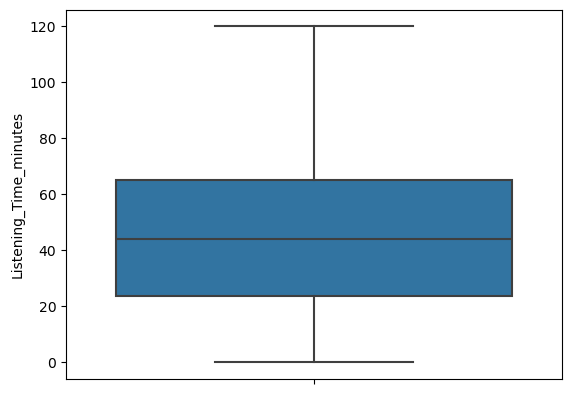

In [88]:
sns.boxplot(y='Listening_Time_minutes', data=train)

In [90]:
!pip install missingno -q
import missingno as msno

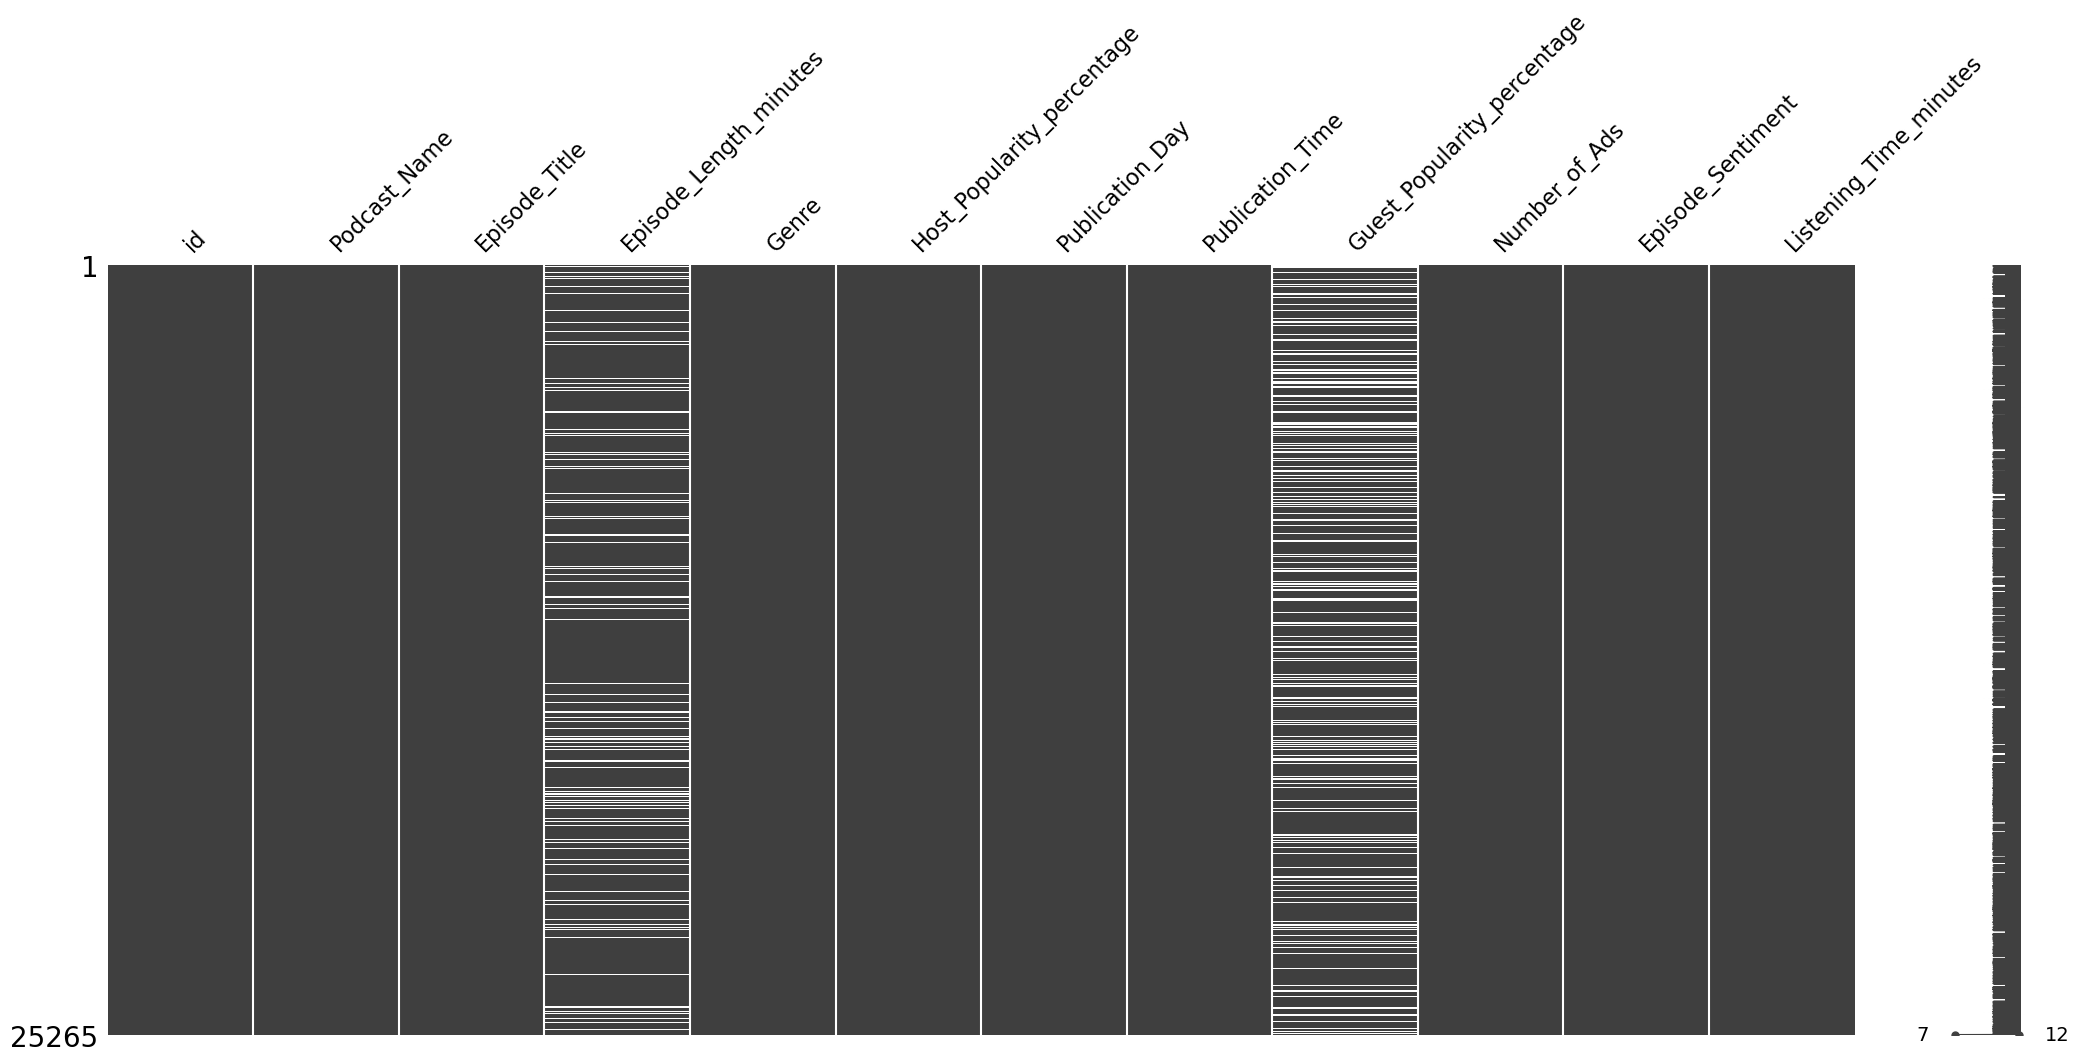

In [91]:
msno.matrix(train)  # Visual representation of missing data
plt.show()

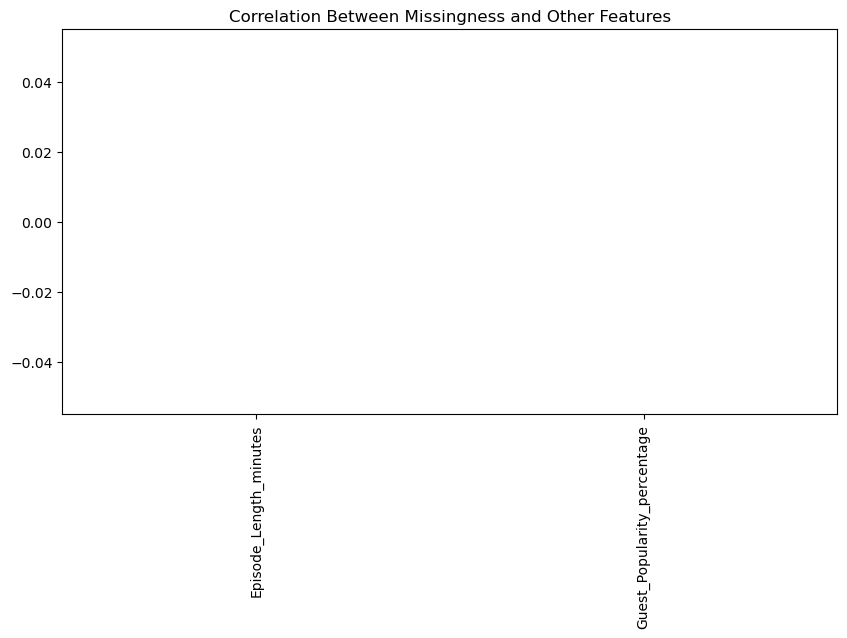

In [99]:
# Create a new column indicating missing values (1 if missing, 0 otherwise)
missing_indicators = train[['Episode_Length_minutes', 'Guest_Popularity_percentage']].isnull().astype(int)

In [106]:
missing_indicators.corr()

,Episode_Length_minutes,Guest_Popularity_percentage
Episode_Length_minutes,1.00,0.06
Guest_Popularity_percentage,0.06,1.00


In [111]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Episode_Sentiment').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Episode_Sentiment,,
Negative,0.12,0.20
Neutral,0.11,0.19
Positive,0.12,0.19


In [112]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Publication_Time').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Publication_Time,,
Afternoon,0.11,0.20
Evening,0.12,0.20
Morning,0.11,0.20
Night,0.11,0.18


In [113]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Publication_Day').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Publication_Day,,
Friday,0.11,0.19
Monday,0.11,0.18
Saturday,0.12,0.21
Sunday,0.11,0.19
Thursday,0.13,0.20
Tuesday,0.13,0.20
Wednesd,0.00,1.00
Wednesday,0.12,0.19


In [114]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Genre').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Genre,,
Business,0.12,0.22
Comedy,0.12,0.18
Education,0.12,0.22
Health,0.11,0.18
Lifestyle,0.11,0.18
Music,0.11,0.17
News,0.13,0.21
Sports,0.11,0.20
Technology,0.12,0.20


In [115]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Episode_Title').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Episode_Title,,
Episode 1,0.11,0.20
Episode 10,0.10,0.21
Episode 100,0.16,0.29
Episode 11,0.12,0.20
Episode 12,0.14,0.20
...,...,...
Episode 95,0.14,0.20
Episode 96,0.10,0.20
Episode 97,0.08,0.23


In [116]:
# Example: Check if a categorical column influences missing values in another column
train.groupby('Podcast_Name').agg({
    'Episode_Length_minutes': lambda x: x.isnull().mean(), 
    'Guest_Popularity_percentage': lambda x: x.isnull().mean() 
})


,Episode_Length_minutes,Guest_Popularity_percentage
Podcast_Name,,
Athlete's Arena,0.11,0.17
Brain Boost,0.11,0.17
Business Briefs,0.13,0.22
Business Insights,0.13,0.25
Comedy Corner,0.11,0.17
Crime Chronicles,0.11,0.19
Criminal Minds,0.11,0.19
Current Affairs,0.17,0.22
Daily Digest,0.12,0.20


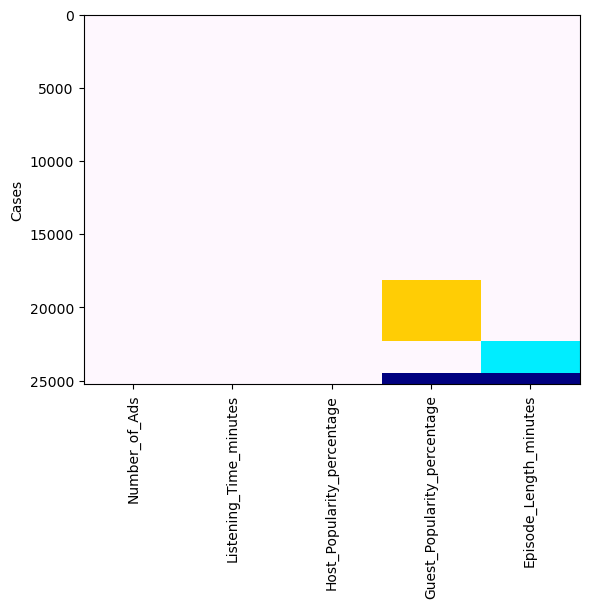

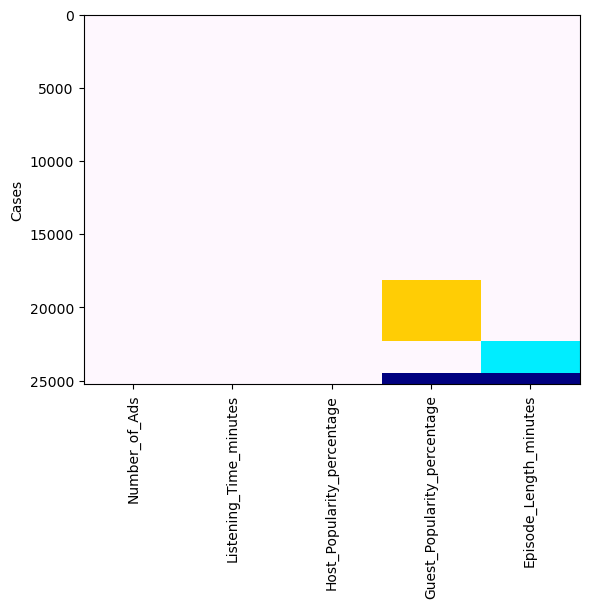

In [125]:
from statsmodels.imputation.mice import MICEData

mice_data = MICEData(train[num_cols])
mice_data.plot_missing_pattern()
